In [1]:
# importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numba import njit

sns.set_context('talk')

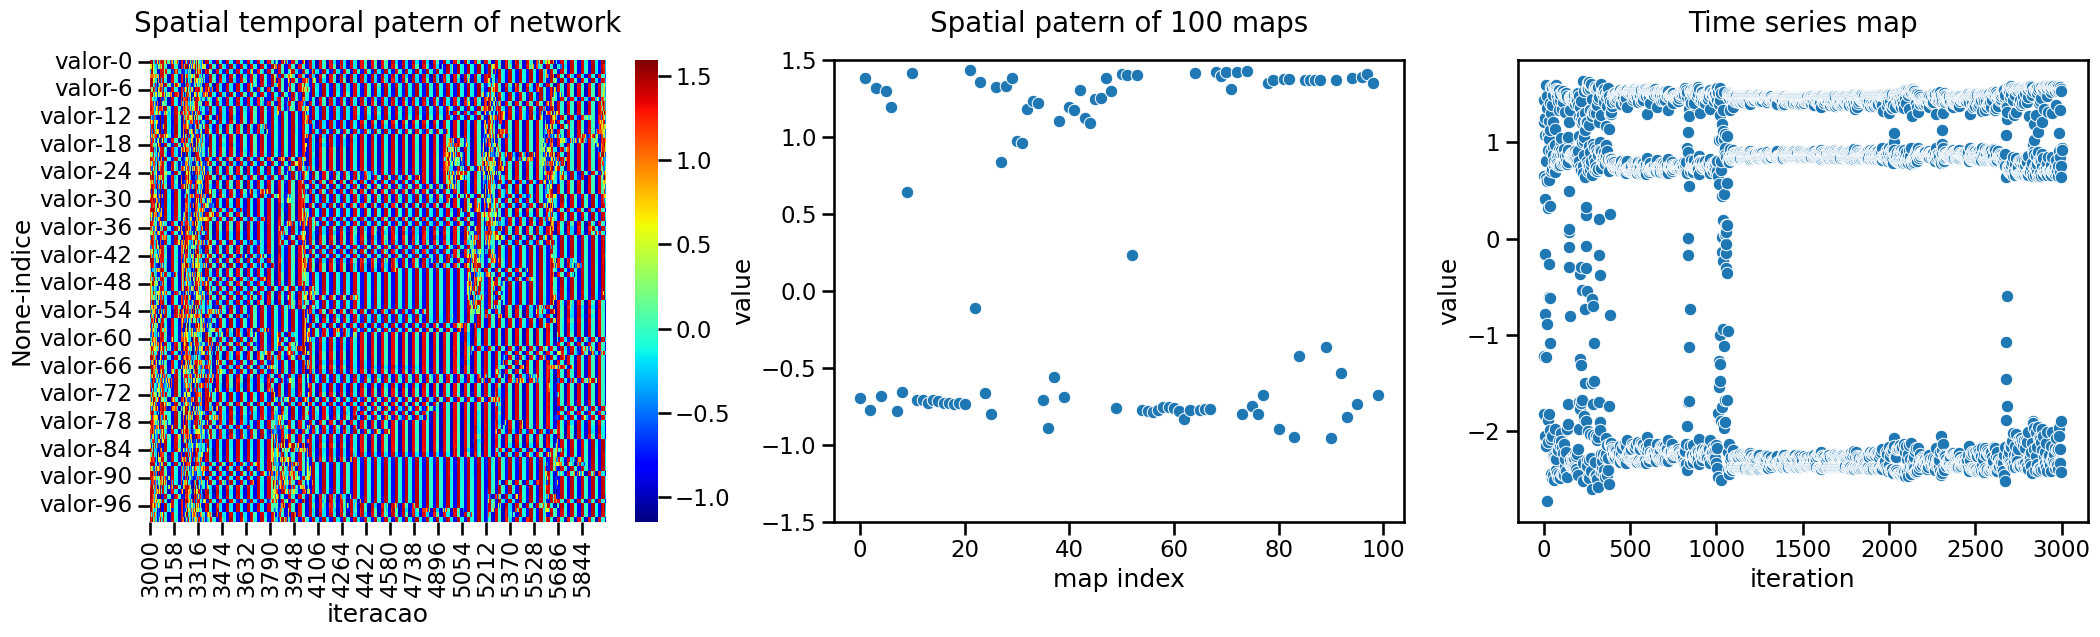

In [2]:
! gcc rulkov-global.c -o x.x -lm
! ./x.x

dado_patricio = pd.read_csv('quimera_ultimo.dat', sep=' ',
                           header=None)
dado_patricio.columns = ['indice','valor']

dado_patricio_spatial_temporal = pd.read_csv('quimera.dat', header=None, sep=' ')
dado_patricio_spatial_temporal.columns = ['indice', 'iteracao','valor']
dados_spaco_temporal = dado_patricio_spatial_temporal.pivot('iteracao','indice')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,6))

periodo = np.arange(3000,6000,2)


sns.heatmap(data = dados_spaco_temporal.loc[periodo].T,ax=ax[0], cmap='jet')
sns.scatterplot(data = dados_spaco_temporal.iloc[1000,:].values, ax=ax[1])
sns.scatterplot(data = dados_spaco_temporal.iloc[:,60].diff().values, ax=ax[2])


ax[0].set_title('Spatial temporal patern of network', fontsize=20, pad=20)

ax[1].set_title('Spatial patern of 100 maps', fontsize=20, pad=20)
ax[1].set_ylim(-1.5, 1.5)
ax[1].set_ylabel('value')
ax[1].set_xlabel('map index')


ax[2].set_title('Time series map', fontsize=20, pad=20)
ax[2].set_ylabel('value')
ax[2].set_xlabel('iteration')


fig;


In [23]:
def diagnostics(xdata, delta=0.02, p=1, return_vecs=False, sample_size=2):
    n = len(xdata)
    distmat = np.zeros((n, n))
    aux_distmat = np.zeros((n, n))
    recmat = np.zeros((n, n))
    signvec = np.zeros(n)
    
    for i in range(0, sample_size, p):
        # Get the distance matrix
        for j in range(n):
            aux_distmat[:, j] = xdata[::p, i]
        distmat += np.abs(aux_distmat - aux_distmat.transpose())
    distmat = distmat/(sample_size) # faz uma média?? 
    # Get the recurrence matrix
    recmat[np.where(distmat < delta)] = 1
    # Get the recurrence rate
    RR = np.sum(recmat)/n**2
    evals, evecs = np.linalg.eig(recmat)
    idx = evals.argsort()[::-1]   
    evals = evals[idx]
    evecs = evecs[:,idx]
    # Sign vector
    j = 0
    while evals[j] > 1.0:
        signvec += abs(evecs[:, j])
        j += 1
    signvec[np.where(signvec > 1e-8)] = 1.0
    # Sum all the elements of signvec to use as the diagnostic
    csum = np.sum(signvec)

    if return_vecs:
        return (csum, RR), distmat, recmat, signvec
    else:
        return (csum, RR)


In [4]:
xdata = dados_spaco_temporal.values

In [5]:
from pyunicorn.timeseries import RecurrencePlot, RecurrenceNetwork

pyunicorn: Package netCDF4 could not be loaded. Some functionality in class Data might not be available!
pyunicorn: Package netCDF4 could not be loaded. Some functionality in class NetCDFDictionary might not be available!


Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


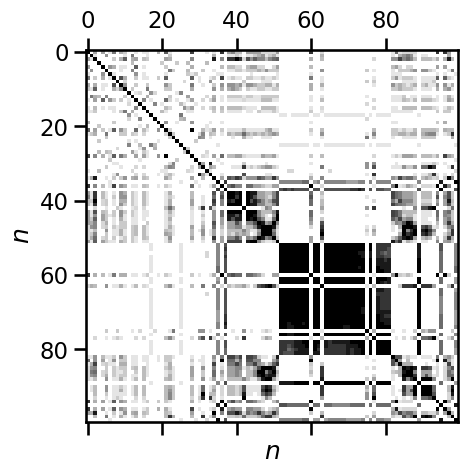

In [31]:
for i in range(1,10):
    rp = RecurrencePlot(xdata[-i,:], dim=1, tau=0, metric='euclidean',
                        normalize=False, threshold=0.05)
    distmap += rp.recurrence_matrix()
    rec = distmap / i
    
plt.matshow(rec, cmap='binary')
plt.xlabel("$n$")
plt.ylabel("$n$")
plt.show()

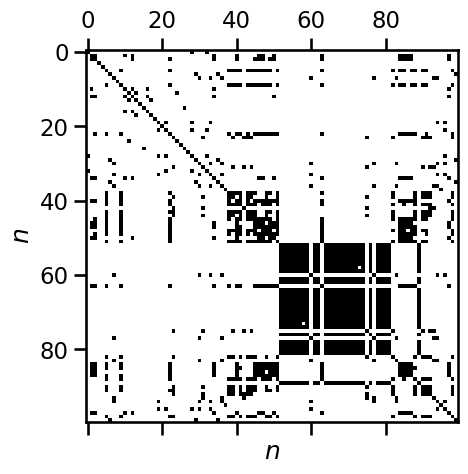

In [7]:
plt.matshow(rp.recurrence_matrix(), cmap='binary')
plt.xlabel("$n$")
plt.ylabel("$n$")
plt.show()

<AxesSubplot:>

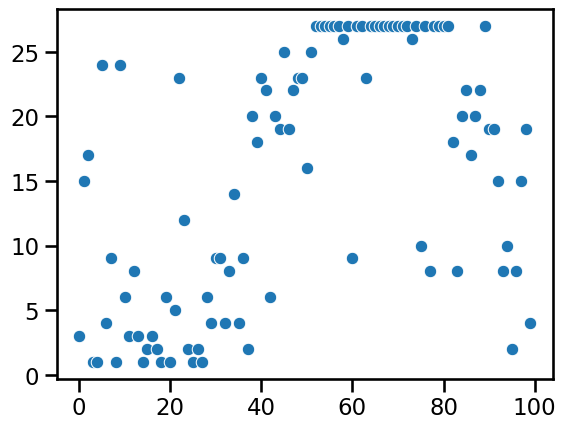

In [8]:
recurrence_matrix = pd.DataFrame(rp.recurrence_matrix(), index=list(range(100)), columns=list(range(100)))

sns.scatterplot(data = recurrence_matrix.sum())

(90.0, 0.065)


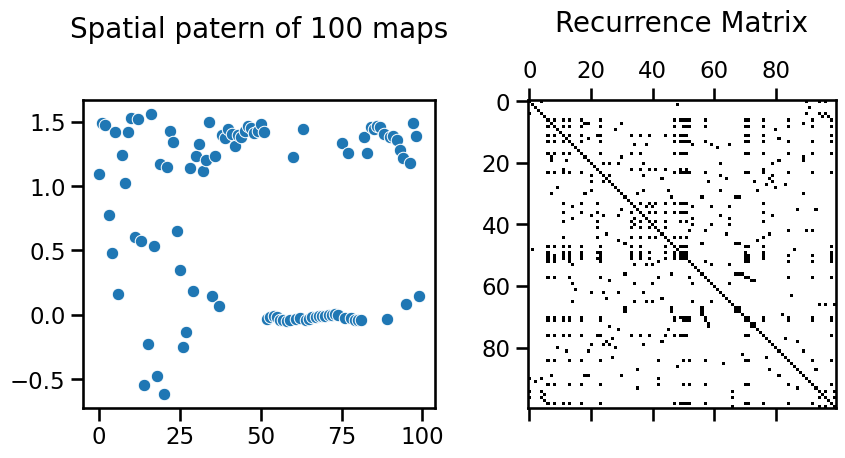

In [24]:
diagnostic, distmat, recmat, signvec = diagnostics(xdata.T,delta=0.05, return_vecs=True)

print(diagnostic)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.scatterplot(data = xdata[-1,:], ax=ax[0])
ax[1].matshow(recmat, cmap='binary')


ax[0].set_title('Spatial patern of 100 maps', fontsize=20, pad=45)
ax[1].set_title('Recurrence Matrix', fontsize=20, pad=20)

plt.show();